In [3]:
from tqdm import tqdm
import xarray as xr
import os
import seaborn as sns
import sys
sys.path.append('..')
from scipy import signal, stats, io

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 10
plt.rcParams['image.cmap'] = 'plasma'
np.set_printoptions(suppress=True)
%load_ext autoreload
%autoreload 2

In [15]:
bold_path = "../data/SimBoldNsubj_01_BLOCK_2s_TR_20s_DUR_10_BLOCKS_MATRIXv11.mat"
mat_path = '../data/01_BLOCK.mat'
input_data = io.loadmat(mat_path)

In [5]:
bold_mat = io.loadmat(bold_path)

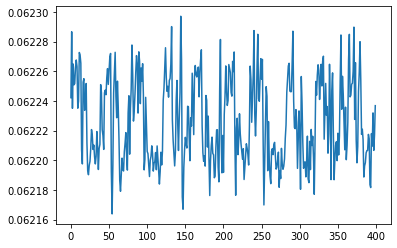

In [25]:
plt.plot(bold_mat['oscill'][3:,0,0])

In [100]:
BOLD = bold_mat['oscill'][3:,:,0]
maskRest = np.array(400*[False])
maskTaskB = np.array(400*[False])
maskTaskA  = np.array(400*[False])
badMask = np.array(400*[False])
for el in np.nditer(input_data['onsets'][0,0]//2):
    maskTaskA[el+3:el+10]=True
    maskRest[el+13:el+20]=True
for el in np.nditer(input_data['onsets'][0,1]//2):
    maskTaskB[el:el+10]=True 
    maskRest[el+13:el+20]=True

In [128]:
def plot_cors(bold, title_list=None, masks=None, noise_level=0.5):

    if title_list is None:
        title_list = ["Rest","TaskA", "TaskB","TaskA-TaskB"]
    if masks is None:    
        masks = [maskRest, maskTaskA, maskTaskB]
        
    BoldNormed = (bold- bold.mean())/(bold.std())
    BoldNoised = BoldNormed + noise_level*np.random.normal(size = BoldNormed.shape) 
    corrs = [np.corrcoef( BoldNoised[masks[i],:].T)  for i in range (3)]
    corrs.append(corrs[1]-corrs[2])
    
    
    
    fig, axs = plt.subplots(1, 4, figsize = (15,5))

    for i in [0,1,2,3]:
        im = axs[i].imshow(corrs[i], cmap='jet', vmin = 0, vmax=1); axs[i].set_title(title_list[i]);
        fig.colorbar(im, ax = axs[i], fraction=0.046, pad=0.04);
    fig.suptitle(f"Correlation structure with NSR = {noise_level}", fontsize=14)    
    fig.tight_layout()


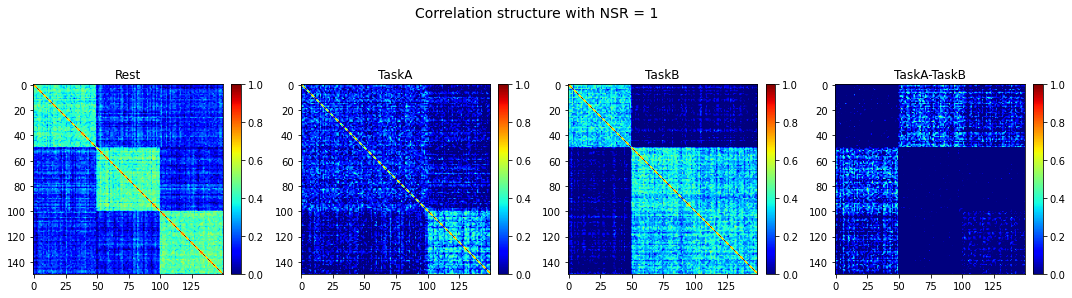

In [129]:
plot_cors(BOLD, noise_level=1)

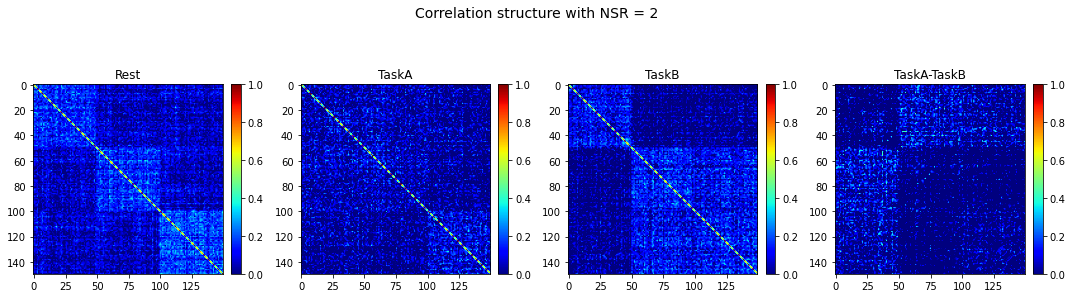

In [130]:
plot_cors(BOLD, noise_level=2)